In [50]:
from matplotlib import pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import pyarrow as pa

In [51]:
pd.read_parquet(path='Data/stock_df.parquet', engine='pyarrow').head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2019-12-31,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000
1,2019-12-31,MSFT,153.745224,157.699997,157.770004,156.449997,156.770004,18369400
2,2019-12-31,TSLA,27.888666,27.888666,28.086000,26.805332,27.000000,154285500
3,2020-01-02,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
4,2020-01-02,MSFT,156.591995,160.619995,160.729996,158.330002,158.779999,22622100


In [52]:
START_DATE = '2020-01-01'
END_DATE = '2022-09-30'
TICKERS = 'GOOGL MSFT TSLA'
stock_data = yf.download(TICKERS, START_DATE, END_DATE)

[*********************100%***********************]  3 of 3 completed


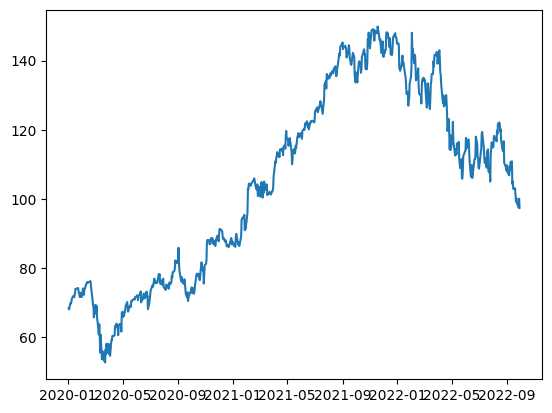

In [53]:
TICKER = 'GOOGL'
GOOGL = stock_data['Adj Close'].loc[START_DATE:END_DATE, TICKER]
plt.plot(GOOGL)

In [54]:
ret_df = pd.DataFrame(GOOGL.diff().dropna())
print('Avg. return: ', ret_df.mean())
print('Volatility: ', ret_df.std())
print('VaR99: ', np.abs(ret_df.quantile(.01)))
print('VaR95: ', np.abs(ret_df.quantile(.05)))

Avg. return:  GOOGL    0.041948
dtype: float64
Volatility:  GOOGL    2.099984
dtype: float64
VaR99:  GOOGL    5.518997
Name: 0.01, dtype: float64
VaR95:  GOOGL    3.753502
Name: 0.05, dtype: float64


In [55]:
stock_data.head(5)

Adj Close                             Close              \
                GOOGL        MSFT       TSLA      GOOGL        MSFT   
Date                                                                  
2019-12-31  66.969498  153.745239  27.888666  66.969498  157.699997   
2020-01-02  68.433998  156.591995  28.684000  68.433998  160.619995   
2020-01-03  68.075996  154.642151  29.534000  68.075996  158.619995   
2020-01-06  69.890503  155.041840  30.102667  69.890503  159.029999   
2020-01-07  69.755501  153.628250  31.270666  69.755501  157.580002   

                            High                               Low  \
                 TSLA      GOOGL        MSFT       TSLA      GOOGL   
Date                                                                 
2019-12-31  27.888666  67.032997  157.770004  28.086000  66.606499   
2020-01-02  28.684000  68.433998  160.729996  28.713333  67.324501   
2020-01-03  29.534000  68.687500  159.949997  30.266666  67.365997   
2020-01-06  30.102667  69.916000  159.100006  30.104000  67.550003   
2020-01-07  31.270666  70.175003  159.669998  31.441999  69.578003   

                                        Open                           Volume  \
                  MSFT       TSLA      GOOGL        MSFT       TSLA     GOOGL   
Date                                                                            
2019-12-31  156.449997  26.805332  66.789497  156.770004  27.000000  19514000   
2020-01-02  158.330002  28.114000  67.420502  158.779999  28.299999  27278000   
2020-01-03  158.059998  29.128000  67.400002  158.320007  29.366667  23408000   
2020-01-06  156.509995  29.333332  67.581497  157.080002  29.364668  46768000   
2020-01-07  157.320007  30.224001  70.023003  159.320007  30.760000  34330000   

                                 
                MSFT       TSLA  
Date                             
2019-12-31  18369400  154285500  
2020-01-02  22622100  142981500  
2020-01-03  21116200  266677500  
2020-01-06  20813700  151995000  
2020-01-07  21634100  268231500

In [56]:
stock_df = stock_data.stack().reset_index().rename(columns={'level_1': 'Ticker'})
stock_df.columns = stock_df.columns.str.replace(' ', '_')
stock_df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2019-12-31,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000
1,2019-12-31,MSFT,153.745239,157.699997,157.770004,156.449997,156.770004,18369400
2,2019-12-31,TSLA,27.888666,27.888666,28.086000,26.805332,27.000000,154285500
3,2020-01-02,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
4,2020-01-02,MSFT,156.591995,160.619995,160.729996,158.330002,158.779999,22622100


In [57]:
stock_df.to_parquet('Data/stock_df.parquet')

In [58]:
stock_df = pd.read_parquet('Data/stock_df.parquet').head()
stock_df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2019-12-31,GOOGL,66.969498,66.969498,67.032997,66.606499,66.789497,19514000
1,2019-12-31,MSFT,153.745239,157.699997,157.770004,156.449997,156.770004,18369400
2,2019-12-31,TSLA,27.888666,27.888666,28.086000,26.805332,27.000000,154285500
3,2020-01-02,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
4,2020-01-02,MSFT,156.591995,160.619995,160.729996,158.330002,158.779999,22622100


In [59]:
START_DATE = stock_df.Date.max()
stock_data = yf.download(TICKERS, START_DATE)

[*********************100%***********************]  3 of 3 completed


In [60]:
print('new max: ', stock_data.index.max())
print('old_max: ', stock_df.Date.max())

new max:  2022-10-04 00:00:00
old_max:  2020-01-02 00:00:00


Aim here:
(1) Find a way to append anything that can be added after the latest ticker data.
(2) Flag if any previous data has been changed.

In [61]:
from pandas.tseries.holiday import USFederalHolidayCalendar as cal

In [62]:
pd.bdate_range(stock_df.Date.max(), stock_data.index.max())

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-26',
               '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
               '2022-10-03', '2022-10-04'],
              dtype='datetime64[ns]', length=719, freq='B')

In [70]:
import c_stock_data as SD

In [71]:
sd_c = SD.StockData(stock_data)

In [78]:
sd_c.

Adj Close                               Close              \
                 GOOGL        MSFT        TSLA       GOOGL        MSFT   
Date                                                                     
2020-01-02   68.433998  156.591995   28.684000   68.433998  160.619995   
2020-01-03   68.075996  154.642181   29.534000   68.075996  158.619995   
2020-01-06   69.890503  155.041901   30.102667   69.890503  159.029999   
2020-01-07   69.755501  153.628265   31.270666   69.755501  157.580002   
2020-01-08   70.251999  156.075302   32.809334   70.251999  160.089996   
...                ...         ...         ...         ...         ...   
2022-09-28  100.050003  241.070007  287.809998  100.050003  241.070007   
2022-09-29   97.419998  237.500000  268.209991   97.419998  237.500000   
2022-09-30   95.650002  232.899994  265.250000   95.650002  232.899994   
2022-10-03   98.639999  240.740005  242.399994   98.639999  240.740005   
2022-10-04  101.639999  248.880005  249.440002  101.639999  248.880005   

                              High                                 Low  \
                  TSLA       GOOGL        MSFT        TSLA       GOOGL   
Date                                                                     
2020-01-02   28.684000   68.433998  160.729996   28.713333   67.324501   
2020-01-03   29.534000   68.687500  159.949997   30.266666   67.365997   
2020-01-06   30.102667   69.916000  159.100006   30.104000   67.550003   
2020-01-07   31.270666   70.175003  159.669998   31.441999   69.578003   
2020-01-08   32.809334   70.592499  160.800003   33.232666   69.631500   
...                ...         ...         ...         ...         ...   
2022-09-28  287.809998  100.699997  242.330002  289.000000   97.110001   
2022-09-29  268.209991   98.639999  239.949997  283.649994   95.959999   
2022-09-30  265.250000   98.900002  240.539993  275.570007   95.559998   
2022-10-03  242.399994   99.290001  241.610001  255.160004   96.519997   
2022-10-04  249.440002  101.839996  250.360001  257.500000  100.379997   

                                          Open                          \
                  MSFT        TSLA       GOOGL        MSFT        TSLA   
Date                                                                     
2020-01-02  158.330002   28.114000   67.420502  158.779999   28.299999   
2020-01-03  158.059998   29.128000   67.400002  158.320007   29.366667   
2020-01-06  156.509995   29.333332   67.581497  157.080002   29.364668   
2020-01-07  157.320007   30.224001   70.023003  159.320007   30.760000   
2020-01-08  157.949997   31.215334   69.740997  158.929993   31.580000   
...                ...         ...         ...         ...         ...   
2022-09-28  234.729996  277.570007   97.650002  236.809998  283.079987   
2022-09-29  234.410004  265.779999   98.639999  238.889999  282.760010   
2022-09-30  232.729996  262.470001   97.050003  238.289993  266.149994   
2022-10-03  234.660004  241.009995   96.760002  235.410004  254.500000   
2022-10-04  244.979996  242.009995  100.440002  245.089996  250.520004   

              Volume                       
               GOOGL      MSFT       TSLA  
Date                                       
2020-01-02  27278000  22622100  142981500  
2020-01-03  23408000  21116200  266677500  
2020-01-06  46768000  20813700  151995000  
2020-01-07  34330000  21634100  268231500  
2020-01-08  35314000  27746500  467164500  
...              ...       ...        ...  
2022-09-28  32466300  29029700   54664800  
2022-09-29  31047200  27484200   77620600  
2022-09-30  32910100  35671100   67517800  
2022-10-03  27982000  28880400   98363500  
2022-10-04  28821800  34866700  109344200  

[695 rows x 18 columns]

In [65]:
sd_c.stock_data_df().head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2020-01-02,GOOGL,68.433998,68.433998,68.433998,67.324501,67.420502,27278000
1,2020-01-02,MSFT,156.591995,160.619995,160.729996,158.330002,158.779999,22622100
2,2020-01-02,TSLA,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
3,2020-01-03,GOOGL,68.075996,68.075996,68.687500,67.365997,67.400002,23408000
4,2020-01-03,MSFT,154.642181,158.619995,159.949997,158.059998,158.320007,21116200
...,...,...,...,...,...,...,...,...
2080,2022-10-03,MSFT,240.740005,240.740005,241.610001,234.660004,235.410004,28880400
2081,2022-10-03,TSLA,242.399994,242.399994,255.160004,241.009995,254.500000,98363500
2082,2022-10-04,GOOGL,101.639999,101.639999,101.839996,100.379997,100.440002,28821800
2083,2022-10-04,MSFT,248.880005,248.880005,250.360001,244.979996,245.089996,34866700


In [68]:
test_df = sd_c.stock_data_df()
test_df.head()

cols = test_df.columns

test_df \
    .sort_values(by=['Ticker', 'Date']) \
    .set_index(['Ticker', 'Date']) \
    .diff() \
    .reset_index() \
    [cols]


,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2020-01-02,GOOGL,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,GOOGL,-0.358002,-0.358002,0.253502,0.041496,-0.020500,-3870000.0
2,2020-01-06,GOOGL,1.814507,1.814507,1.228500,0.184006,0.181496,23360000.0
3,2020-01-07,GOOGL,-0.135002,-0.135002,0.259003,2.028000,2.441505,-12438000.0
4,2020-01-08,GOOGL,0.496498,0.496498,0.417496,0.053497,-0.282005,984000.0
...,...,...,...,...,...,...,...,...
2080,2022-09-28,TSLA,4.869995,4.869995,0.329987,0.059998,-0.760010,-7260400.0
2081,2022-09-29,TSLA,-19.600006,-19.600006,-5.350006,-11.790009,-0.319977,22955800.0
2082,2022-09-30,TSLA,-2.959991,-2.959991,-8.079987,-3.309998,-16.610016,-10102800.0
2083,2022-10-03,TSLA,-22.850006,-22.850006,-20.410004,-21.460007,-11.649994,30845700.0
